In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My\ Drive/Colab_Notebooks

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab_Notebooks


In [3]:
%cd coursera-deep-learning-specialization-master/C4\ \-\ Convolutional\ Neural\ Networks/Week\ 2/KerasTutorial

/content/drive/My Drive/Colab_Notebooks/coursera-deep-learning-specialization-master/C4 - Convolutional Neural Networks/Week 2/KerasTutorial


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


In [6]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [7]:
def HappyModel(input_shape):
  X_input = Input(input_shape)
  X = ZeroPadding2D((3,3))(X_input)

  X = Conv2D(32, (7,7), strides=(1,1), name = 'conv0')(X)
  #X = Conv2D(16, (7,7), strides=(1,1), name = 'conv0')(X)
  X = BatchNormalization(axis= 3, name = 'bn0')(X)
  X = Activation('relu')(X)
  #X = MaxPooling2D((2,2), name = 'max_poo0')(X)

  #X = Conv2D(64, (3,3), strides=(1,1), name = 'conv1')(X)
  #X = BatchNormalization(axis= 3, name = 'bn1')(X)
  #X = Activation('relu')(X)
  #X = MaxPooling2D((2,2), name = 'max_pool')(X)

  X = Flatten()(X)
  #X = Dense(400, activation='relu', name = 'fc0')(X)
  X = Dense(1, activation='sigmoid', name = 'fc1')(X)

  model = Model(input = X_input, outputs = X, name = 'HappyModel')

  return model

In [8]:
happyModel = HappyModel(X_train.shape[1:])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("fc..., name="HappyModel", inputs=Tensor("in...)`


In [9]:
happyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
happyModel.fit(x= X_train,y= Y_train, epochs=20, batch_size=16)

Epoch 1/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0985 - accuracy: 0.9767
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.3348 - accuracy: 0.9367
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.6570 - accuracy: 0.9100
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.5851 - accuracy: 0.9167
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.9096 - accuracy: 0.9000
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.1451 - accuracy: 0.9683
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.3415 - accuracy: 0.9583
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2514 - accuracy: 0.9733
Epoch 9/20
600/600 [==============================] - 5s 8ms/step - loss: 0.2018 - accuracy: 0.9650
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.3240 - accuracy: 0.9650

In [12]:
preds = happyModel.evaluate(x= X_test, y= Y_test)
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

150/150 [==============================] - 1s 4ms/step

Loss = 1.270592861175537
Test Accuracy = 0.8066666722297668


In [ ]:
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_14 (ZeroPaddi (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 131072)            0         
_________________________________________________________________
fc1 (Dense)                  (None, 1)                 1

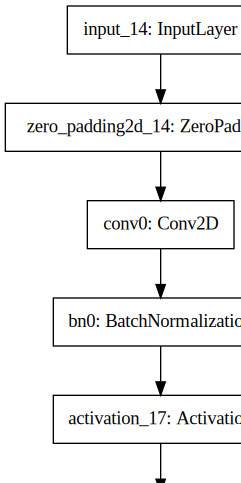

In [ ]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))